In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

C:\Users\DELL-IN\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\DELL-IN\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\DELL-IN\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\DELL-IN\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "

In [2]:
pwd

'C:\\Users\\DELL-IN'

In [3]:
cd "C:/Users/DELL-IN/Downloads/Video/AL/Data Science Final Projects/Start/3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1/"

C:\Users\DELL-IN\Downloads\Video\AL\Data Science Final Projects\Start\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION1


In [4]:
credit=pd.read_csv('CREDIT CARD USERS DATA.csv')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
credit.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


In [8]:
credit=credit.drop(['custid','age','birthmonth','ed','employ','income','lninc','debtinc','lncreddebt','lnothdebt','spoused',
                   'pets_cats','pets_dogs','pets_birds','pets_reptiles','pets_small','pets_saltfish','pets_freshfish','address',
                'carvalue','commute','commutetime','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail',
                'commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','polview','vote','cardtenure',
                 'card2tenure','bfast','tenure','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon','lnequipten',
                'lncardmon','lncardten','lnwiremon','lnwireten','hourstv','longten','cardten'],axis=1)

In [9]:
#credit=credit.replace("#NULL!",'',regex=True)

In [10]:
credit.head()

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,2.00,1.0,2.0,3.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,5.00,0.0,2.0,4.0,2.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,4.00,1.0,6.0,2.0,2.0,0.0,5.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,3.00,0.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.00,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 81 columns):
region            5000 non-null float64
townsize          5000 non-null object
gender            5000 non-null float64
agecat            5000 non-null float64
edcat             5000 non-null float64
jobcat            5000 non-null float64
union             5000 non-null float64
empcat            5000 non-null float64
retire            5000 non-null float64
inccat            5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
default           5000 non-null float64
jobsat            5000 non-null float64
marital           5000 non-null float64
spousedcat        5000 non-null float64
reside            5000 non-null float64
pets              5000 non-null float64
homeown           5000 non-null float64
hometype          5000 non-null float64
addresscat        5000 non-null float64
cars              5000 non-null float64
carown        

In [12]:
credit.to_csv('credit.csv')

numerical and categorical 

In [13]:
num_var=['creddebt','othdebt','pets','carditems','cardspent','card2items','card2spent','longmon','tollmon','tollten',
         'equipmon','equipten','cardmon','wiremon','wireten']

In [14]:
credit_num=credit[num_var]

In [15]:
credit_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
creddebt      5000 non-null float64
othdebt       5000 non-null float64
pets          5000 non-null float64
carditems     5000 non-null float64
cardspent     5000 non-null float64
card2items    5000 non-null float64
card2spent    5000 non-null float64
longmon       5000 non-null float64
tollmon       5000 non-null float64
tollten       5000 non-null float64
equipmon      5000 non-null float64
equipten      5000 non-null float64
cardmon       5000 non-null float64
wiremon       5000 non-null float64
wireten       5000 non-null float64
dtypes: float64(15)
memory usage: 586.0 KB


In [16]:
credit_num=credit_num.replace("#NULL!",'',regex=True)

In [17]:
credit_num.head()

,creddebt,othdebt,pets,carditems,cardspent,card2items,card2spent,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten
0,1.20,2.24,0.0,5.0,81.66,4.0,67.80,6.50,29.0,161.05,29.50,126.1,14.25,0.00,0.00
1,1.22,1.57,6.0,5.0,42.60,2.0,34.94,8.90,0.0,0.00,54.85,1975.0,16.00,45.65,1683.55
2,0.93,2.54,3.0,9.0,184.22,7.0,175.75,28.40,0.0,0.00,0.00,0.0,23.00,0.00,0.00
3,0.02,1.12,0.0,17.0,340.99,1.0,18.42,6.00,0.0,0.00,0.00,0.0,21.00,0.00,0.00
4,0.21,0.18,0.0,8.0,255.10,7.0,252.73,3.05,16.5,387.70,0.00,0.0,17.25,19.05,410.80


In [18]:
#credit_ca=credit.columns.difference(credit_num)

In [19]:
cat_var=['active', 'addresscat', 'agecat', 'callcard', 'callid', 'callwait',
       'carbought', 'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit',
       'card2fee','card2tenurecat', 'card2type','cardbenefit', 'cardfee', 
       'cardtenurecat', 'cardtype', 'carown', 'cars', 'cartype', 'churn',
       'commutecat', 'confer', 'default', 'ebill', 'edcat',
       'empcat', 'equip', 'forward', 'gender',
       'homeown', 'hometype', 'inccat', 'internet', 'jobcat', 'jobsat',
        'marital', 'multline', 'news', 'owncd', 'owndvd',
       'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr',
       'pager','polcontrib', 'polparty', 'reason', 'region', 'reside',
       'response_01', 'response_02', 'response_03', 'retire', 'spousedcat',
       'tollfree', 'townsize', 'union', 'voice','wireless']

In [20]:
credit_cat=credit[cat_var]

In [21]:
credit_cat=credit_cat.replace("#NULL!",'',regex=True)

In [22]:
credit_cat.head()

,active,addresscat,agecat,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,...,response_01,response_02,response_03,retire,spousedcat,tollfree,townsize,union,voice,wireless
0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,...,0.0,1.0,0.0,0.0,-1.0,1.0,2.00,1.0,1.0,0.0
1,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,5.00,0.0,1.0,1.0
2,0.0,5.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,4.00,0.0,0.0,0.0
3,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.00,0.0,0.0,0.0
4,1.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,0.0,1.0,0.0,0.0,2.0,1.0,2.00,0.0,1.0,1.0


In [23]:
# Fill with mode
credit_cat['townsize']=credit_cat['townsize'].fillna(1)

In [24]:
# Mapping cars and commutetime variable to make them categorical

credit_cat['cars'] = pd.cut(credit_cat['cars'], bins=[-1, 2, 5, 8], labels=['0-2', '3-5', '6-8'])
credit_cat['reside'] = pd.cut(credit_cat['reside'], bins=[0, 3, 6, 10], labels=['1-3', '4-6', '7-9'])

In [25]:
for i in cat_var:
    credit_cat[i]=credit_cat[i].astype('object')

In [26]:
credit_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 66 columns):
active            5000 non-null object
addresscat        5000 non-null object
agecat            5000 non-null object
callcard          5000 non-null object
callid            5000 non-null object
callwait          5000 non-null object
carbought         5000 non-null object
carbuy            5000 non-null object
carcatvalue       5000 non-null object
card              5000 non-null object
card2             5000 non-null object
card2benefit      5000 non-null object
card2fee          5000 non-null object
card2tenurecat    5000 non-null object
card2type         5000 non-null object
cardbenefit       5000 non-null object
cardfee           5000 non-null object
cardtenurecat     5000 non-null object
cardtype          5000 non-null object
carown            5000 non-null object
cars              5000 non-null object
cartype           5000 non-null object
churn             5000 non-null obj

In [27]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [28]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T

In [29]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
creddebt,5000.0,0.0,9286.82,1.857364,0.93,3.415789,1.166762e+01,0.0,0.0300,0.1000,0.180,0.3900,0.93,2.0600,4.300,6.3715,14.2804,109.07
othdebt,5000.0,0.0,18272.28,3.654456,2.10,5.395214,2.910833e+01,0.0,0.1100,0.2900,0.460,0.9800,2.10,4.3100,8.060,11.8120,24.0618,141.46
pets,5000.0,0.0,15337.00,3.067400,2.00,3.414497,1.165879e+01,0.0,0.0000,0.0000,0.000,0.0000,2.00,5.0000,8.000,10.0000,13.0000,21.00
carditems,5000.0,0.0,50887.00,10.177400,10.00,3.391140,1.149983e+01,0.0,2.0000,5.0000,6.000,8.0000,10.00,12.0000,15.000,16.0000,19.0000,23.00
cardspent,5000.0,0.0,1686012.60,337.202520,276.36,245.145068,6.009610e+04,0.0,40.8195,91.3045,122.534,183.3775,276.36,418.5375,610.062,782.3155,1215.8072,3926.41
card2items,5000.0,0.0,23333.00,4.666600,5.00,2.497017,6.235091e+00,0.0,0.0000,1.0000,1.000,3.0000,5.00,6.0000,8.000,9.0000,11.0000,15.00
card2spent,5000.0,0.0,804380.55,160.876110,125.34,146.292771,2.140157e+04,0.0,0.0000,14.8195,28.639,66.9675,125.34,208.3100,324.718,419.4470,712.1298,2069.25
longmon,5000.0,0.0,67357.25,13.471450,9.55,12.773381,1.631593e+02,0.9,1.8500,2.9000,3.700,5.7000,9.55,16.5500,27.000,36.7575,65.2010,179.85
tollmon,5000.0,0.0,66322.25,13.264450,0.00,16.310018,2.660167e+02,0.0,0.0000,0.0000,0.000,0.0000,0.00,24.5000,35.500,43.5000,58.7525,173.00
tollten,5000.0,0.0,2889162.55,577.832510,0.00,949.151586,9.008887e+05,0.0,0.0000,0.0000,0.000,0.0000,0.00,885.4500,1918.955,2620.2125,3977.2705,6923.45


In [30]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_num=credit_num.apply(lambda x: outlier_capping(x))

In [31]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
creddebt,5000.0,0.0,8791.860,1.758372,0.93,2.380783,5.668128,0.0300,0.030000,0.1000,0.180,0.3900,0.93,2.0600,4.300,6.3715,14.280004,14.2804
othdebt,5000.0,0.0,17612.160,3.522432,2.10,4.221718,17.822902,0.1100,0.110000,0.2900,0.460,0.9800,2.10,4.3100,8.060,11.8120,24.060018,24.0618
pets,5000.0,0.0,15246.000,3.049200,2.00,3.351213,11.230625,0.0000,0.000000,0.0000,0.000,0.0000,2.00,5.0000,8.000,10.0000,13.000000,13.0000
carditems,5000.0,0.0,50878.000,10.175600,10.00,3.348045,11.209407,2.0000,2.000000,5.0000,6.000,8.0000,10.00,12.0000,15.000,16.0000,19.000000,19.0000
cardspent,5000.0,0.0,1668122.385,333.624477,276.36,221.377375,49007.942233,40.8195,40.829895,91.3045,122.534,183.3775,276.36,418.5375,610.062,782.3155,1215.800072,1215.8072
card2items,5000.0,0.0,23282.000,4.656400,5.00,2.466324,6.082756,0.0000,0.000000,1.0000,1.000,3.0000,5.00,6.0000,8.000,9.0000,11.000000,11.0000
card2spent,5000.0,0.0,793007.580,158.601516,125.34,133.230318,17750.317522,0.0000,0.000000,14.8195,28.639,66.9675,125.34,208.3100,324.718,419.4470,712.100298,712.1298
longmon,5000.0,0.0,66363.200,13.272640,9.55,11.551690,133.441533,1.8500,1.850000,2.9000,3.700,5.7000,9.55,16.5500,27.000,36.7575,65.200010,65.2010
tollmon,5000.0,0.0,65700.375,13.140075,0.00,15.811442,250.001704,0.0000,0.000000,0.0000,0.000,0.0000,0.00,24.5000,35.500,43.5000,58.750025,58.7525
tollten,5000.0,0.0,2850650.975,570.130195,0.00,914.744043,836756.664877,0.0000,0.000000,0.0000,0.000,0.0000,0.00,885.4500,1918.955,2620.2125,3977.151205,3977.2705


In [32]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=credit_cat.apply(lambda x: cat_summary(x))

In [33]:
cat_summary.T

,N,NMISS,ColumnsNames
active,5000,0,"0.0 2670 1.0 2330 Name: active, dtype: i..."
addresscat,5000,0,3.0 1221 5.0 1157 4.0 1139 2.0 87...
agecat,5000,0,4.0 1222 5.0 1195 6.0 1068 3.0 89...
callcard,5000,0,"1.0 3581 0.0 1419 Name: callcard, dtype:..."
callid,5000,0,"0.0 2624 1.0 2376 Name: callid, dtype: i..."
callwait,5000,0,"0.0 2605 1.0 2395 Name: callwait, dtype:..."
carbought,5000,0,0.0 2901 1.0 1602 -1.0 497 Name: c...
carbuy,5000,0,"0.0 3195 1.0 1805 Name: carbuy, dtype: i..."
carcatvalue,5000,0,1.0 2399 2.0 1267 3.0 837 -1.0 ...
card,5000,0,4.0 1344 2.0 1247 3.0 1200 1.0 98...


In [34]:
# Make a new var Total_cardspent which is sum of primary card spend and secondary card spend
credit_num['Total_cardspent'] = credit_num['cardspent'] + credit_num['card2spent']

# Make a new var Total_carditems which is sum of primary card spend items and secondary card spend items
credit_num['Total_carditems'] = credit_num['carditems'] + credit_num['card2items']

In [35]:
credit_num.drop(['carditems', 'cardspent', 'card2items', 'card2spent'], inplace=True, axis=1)

In [36]:
credit_cat.gender = credit_cat.gender.map({0:'Male', 1:'Female'})

In [37]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [38]:
#for c_feature in categorical_features

for c_feature in cat_var:
    credit_cat[c_feature] = credit_cat[c_feature].astype('category')
    credit_cat = create_dummies(credit_cat , c_feature )

In [39]:
credit_cat

,active_1.0,addresscat_2.0,addresscat_3.0,addresscat_4.0,addresscat_5.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,callcard_1.0,...,townsize_5.0,townsize_,townsize_1.00,townsize_2.00,townsize_3.00,townsize_4.00,townsize_5.00,union_1.0,voice_1.0,wireless_1.0
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
5,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Concat both num and cat

In [40]:
credit_both = pd.concat([credit_num, credit_cat], axis=1)

In [41]:
credit_both.head()

,creddebt,othdebt,pets,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,...,townsize_5.0,townsize_,townsize_1.00,townsize_2.00,townsize_3.00,townsize_4.00,townsize_5.00,union_1.0,voice_1.0,wireless_1.0
0,1.20,2.24,0.0,6.50,29.0,161.05,29.50,126.1,14.25,0.00,...,0,0,0,1,0,0,0,1,1,0
1,1.22,1.57,6.0,8.90,0.0,0.00,54.85,1975.0,16.00,45.65,...,0,0,0,0,0,0,1,0,1,1
2,0.93,2.54,3.0,28.40,0.0,0.00,0.00,0.0,23.00,0.00,...,0,0,0,0,0,1,0,0,0,0
3,0.03,1.12,0.0,6.00,0.0,0.00,0.00,0.0,21.00,0.00,...,0,0,0,0,1,0,0,0,0,0
4,0.21,0.18,0.0,3.05,16.5,387.70,0.00,0.0,17.25,19.05,...,0,0,0,1,0,0,0,0,1,1


In [42]:
credit_both.to_csv('full.csv')

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


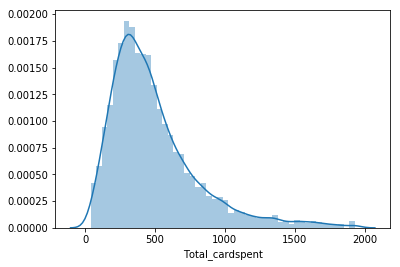

In [43]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(credit_both.Total_cardspent)

In [44]:
credit_both["sqrt_Total_cardspent"]= np.sqrt(credit_both["Total_cardspent"]+1)

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


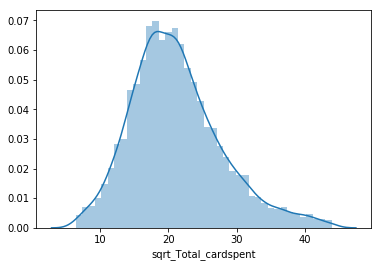

In [45]:
sns.distplot(credit_both.sqrt_Total_cardspent)

In [46]:
credit_both.corr()

,creddebt,othdebt,pets,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,...,townsize_,townsize_1.00,townsize_2.00,townsize_3.00,townsize_4.00,townsize_5.00,union_1.0,voice_1.0,wireless_1.0,sqrt_Total_cardspent
creddebt,1.000000,0.640411,-0.009970,0.124067,0.134850,0.170798,0.060940,0.103355,0.103601,0.112890,...,-0.000785,0.020788,0.022776,-0.020473,-0.022182,-0.018943,0.000943,0.074360,0.085916,0.247004
othdebt,0.640411,1.000000,0.011678,0.141466,0.168206,0.205913,0.080952,0.125059,0.122680,0.162842,...,0.003495,0.004638,0.025416,-0.015794,-0.028003,0.006559,-0.007106,0.091921,0.118376,0.274920
pets,-0.009970,0.011678,1.000000,0.025222,0.003462,0.019927,0.028144,0.026079,0.009325,0.020248,...,0.035525,0.007433,-0.007400,-0.014523,-0.001542,-0.013310,0.023959,0.011229,0.004830,-0.001784
longmon,0.124067,0.141466,0.025222,1.000000,0.156409,0.356075,-0.042520,0.173578,0.417086,0.028291,...,-0.014500,0.009432,0.012576,-0.008812,-0.022600,-0.002240,0.021776,-0.048636,-0.045230,0.047626
tollmon,0.134850,0.168206,0.003462,0.156409,1.000000,0.883660,0.117721,0.161534,0.344942,0.466909,...,-0.004131,0.002967,0.008945,-0.008205,0.003422,-0.012248,0.019444,0.387079,0.405862,0.079246
tollten,0.170798,0.205913,0.019927,0.356075,0.883660,1.000000,0.075362,0.224215,0.341592,0.380052,...,-0.008740,0.010118,0.009899,-0.004849,-0.002435,-0.011942,0.009807,0.273450,0.278496,0.093221
equipmon,0.060940,0.080952,0.028144,-0.042520,0.117721,0.075362,1.000000,0.829186,0.047355,0.580154,...,0.015822,-0.013823,0.016883,-0.005694,0.005224,-0.007370,0.016324,0.485653,0.520600,0.070746
equipten,0.103355,0.125059,0.026079,0.173578,0.161534,0.224215,0.829186,1.000000,0.149692,0.511777,...,-0.000948,0.006280,0.009950,-0.011566,-0.011538,-0.004139,0.008604,0.368404,0.397488,0.085104
cardmon,0.103601,0.122680,0.009325,0.417086,0.344942,0.341592,0.047355,0.149692,1.000000,0.218523,...,-0.009387,0.017314,-0.022750,-0.015229,0.002989,-0.010700,0.012993,0.154776,0.162061,0.025646
wiremon,0.112890,0.162842,0.020248,0.028291,0.466909,0.380052,0.580154,0.511777,0.218523,1.000000,...,0.025000,-0.016348,0.000545,-0.001510,0.000215,-0.006022,0.028420,0.646374,0.913160,0.086186


In [47]:
#Splitting the data

feature_columns = credit_both.columns.difference( ['sqrt_Total_cardspent'] )
feature_columns

Index(['Total_carditems', 'Total_cardspent', 'active_1.0', 'addresscat_2.0',
       'addresscat_3.0', 'addresscat_4.0', 'addresscat_5.0', 'agecat_3.0',
       'agecat_4.0', 'agecat_5.0',
       ...
       'townsize_3.00', 'townsize_4.0', 'townsize_4.00', 'townsize_5.0',
       'townsize_5.00', 'union_1.0', 'voice_1.0', 'wireless_1.0', 'wiremon',
       'wireten'],
      dtype='object', length=155)

In [48]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_both[feature_columns],
                                                  credit_both['sqrt_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
print(len( train_X ))
print(len( test_X))

3500
1500


In [50]:
import statsmodels.api as sm

In [51]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [52]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     sqrt_Total_cardspent   R-squared:                       0.974
Model:                              OLS   Adj. R-squared:                  0.972
Method:                   Least Squares   F-statistic:                     819.4
Date:                  Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                          16:54:31   Log-Likelihood:                -5289.3
No. Observations:                  3500   AIC:                         1.088e+04
Df Residuals:                      3348   BIC:                         1.182e+04
Df Model:                           151                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.2417      0.281     32.877      0.000       8.691       9.793
Total_carditems        0.2074      0.006     37.648      0.000       0.197       0.218
Total_cardspent        0.0181   9.15e-05    197.487      0.000       0.018       0.018
active_1.0            -0.0317      0.040     -0.796      0.426      -0.110       0.046
addresscat_2.0        -0.1532      0.102     -1.505      0.132      -0.353       0.046
addresscat_3.0        -0.1589      0.117     -1.357      0.175      -0.388       0.071
addresscat_4.0        -0.1966      0.128     -1.541      0.123      -0.447       0.053
addresscat_5.0        -0.2097      0.136     -1.538      0.124      -0.477       0.058
agecat_3.0             0.1920      0.111      1.725      0.085      -0.026       0.410
agecat_4.0             0.2241      0.135      1.663      0.096      -0.040       0.488
agecat_5.0             0.1781      0.150      1.188      0.235      -0.116       0.472
agecat_6.0             0.2331      0.164      1.422      0.155      -0.088       0.554
callcard_1.0          -0.0177      0.066     -0.269      0.788      -0.147       0.112
callid_1.0             0.0001      0.057      0.002      0.998      -0.112       0.113
callwait_1.0          -0.0482      0.057     -0.845      0.398      -0.160       0.064
carbought_0.0         -0.0260      0.029     -0.900      0.368      -0.083       0.031
carbought_1.0          0.0180      0.031      0.572      0.567      -0.044       0.080
carbuy_1.0             0.0104      0.042      0.248      0.804      -0.072       0.092
carcatvalue_1.0       -0.0120      0.048     -0.250      0.803      -0.107       0.082
carcatvalue_2.0       -0.0802      0.041     -1.934      0.053      -0.161       0.001
carcatvalue_3.0        0.0842      0.067      1.256      0.209      -0.047       0.216
card2_2.0             -0.5331      0.064     -8.273      0.000      -0.659      -0.407
card2_3.0             -0.5243      0.064     -8.197      0.000      -0.650      -0.399
card2_4.0             -0.5265      0.071     -7.461      0.000      -0.665      -0.388
card2_5.0             -0.3818      0.091     -4.183      0.000      -0.561      -0.203
card2benefit_2.0       0.0947      0.055      1.713      0.087      -0.014       0.203
card2benefit_3.0      -0.0297      0.055     -0.541      0.589      -0.137       0.078
card2benefit_4.0       0.0563      0.055      1.027      0.304      -0.051       0.164
card2fee_1.0           0.1057      0.049      2.138      0.033       0.009       0.203
card2tenurecat_2.0    -0.0362      0.131     -0.276      0.783      -0.293       0.221
card2tenurecat_3.0     0.0734      0.157      0.469      0.639      -0.234       0.381
card2tenurecat_4.0     0.0128      0.173      0.074      0.941      -0.327       0.352
card2tenurecat_5

In [53]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.8369486286974928
MSE: 1.1924069055262068
RMSE: 1.0919738575287445


In [54]:
# Check VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [56]:
all_columns = "+".join(credit_num.columns.difference( ['Total_cardspent'] ))

my_formula = "sqrt_Total_cardspent~" + all_columns

print(my_formula)

sqrt_Total_cardspent~Total_carditems+cardmon+creddebt+equipmon+equipten+longmon+othdebt+pets+tollmon+tollten+wiremon+wireten


In [57]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('sqrt_Total_cardspent~Total_carditems+cardmon+creddebt+equipmon+equipten+longmon+othdebt+pets+tollmon+tollten+wiremon+wireten', credit_both, return_type='dataframe')

In [58]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [59]:
vif[vif["VIF Factor"]>10]

,VIF Factor,features
0,17.131356,Intercept
11,10.544008,wiremon
12,10.656243,wireten


In [60]:
# Drop variables on basis of VIF

In [61]:
credit_both=credit_both.drop(['wiremon','wireten'],axis=1)

In [62]:
#Splitting the data

feature_columns = credit_both.columns.difference( ['sqrt_Total_cardspent'] )
feature_columns

Index(['Total_carditems', 'Total_cardspent', 'active_1.0', 'addresscat_2.0',
       'addresscat_3.0', 'addresscat_4.0', 'addresscat_5.0', 'agecat_3.0',
       'agecat_4.0', 'agecat_5.0',
       ...
       'townsize_2.00', 'townsize_3.0', 'townsize_3.00', 'townsize_4.0',
       'townsize_4.00', 'townsize_5.0', 'townsize_5.00', 'union_1.0',
       'voice_1.0', 'wireless_1.0'],
      dtype='object', length=153)

In [63]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_both[feature_columns],
                                                  credit_both['sqrt_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [64]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [65]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     sqrt_Total_cardspent   R-squared:                       0.974
Model:                              OLS   Adj. R-squared:                  0.972
Method:                   Least Squares   F-statistic:                     830.5
Date:                  Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                          16:54:33   Log-Likelihood:                -5290.0
No. Observations:                  3500   AIC:                         1.088e+04
Df Residuals:                      3350   BIC:                         1.180e+04
Df Model:                           149                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.2546      0.281     32.989      0.000       8.705       9.805
Total_carditems        0.2074      0.006     37.650      0.000       0.197       0.218
Total_cardspent        0.0181   9.15e-05    197.557      0.000       0.018       0.018
active_1.0            -0.0309      0.040     -0.776      0.438      -0.109       0.047
addresscat_2.0        -0.1527      0.102     -1.501      0.134      -0.352       0.047
addresscat_3.0        -0.1595      0.117     -1.362      0.173      -0.389       0.070
addresscat_4.0        -0.1962      0.128     -1.539      0.124      -0.446       0.054
addresscat_5.0        -0.2081      0.136     -1.527      0.127      -0.475       0.059
agecat_3.0             0.1946      0.111      1.750      0.080      -0.023       0.413
agecat_4.0             0.2298      0.135      1.707      0.088      -0.034       0.494
agecat_5.0             0.1838      0.150      1.227      0.220      -0.110       0.477
agecat_6.0             0.2362      0.164      1.442      0.149      -0.085       0.557
callcard_1.0          -0.0167      0.066     -0.253      0.800      -0.146       0.112
callid_1.0             0.0015      0.057      0.027      0.979      -0.111       0.114
callwait_1.0          -0.0476      0.057     -0.834      0.404      -0.159       0.064
carbought_0.0         -0.0259      0.029     -0.895      0.371      -0.083       0.031
carbought_1.0          0.0169      0.031      0.536      0.592      -0.045       0.079
carbuy_1.0             0.0112      0.042      0.267      0.790      -0.071       0.093
carcatvalue_1.0       -0.0103      0.048     -0.214      0.831      -0.105       0.084
carcatvalue_2.0       -0.0807      0.041     -1.948      0.051      -0.162       0.001
carcatvalue_3.0        0.0820      0.067      1.225      0.221      -0.049       0.213
card2_2.0             -0.5350      0.064     -8.305      0.000      -0.661      -0.409
card2_3.0             -0.5265      0.064     -8.236      0.000      -0.652      -0.401
card2_4.0             -0.5274      0.071     -7.475      0.000      -0.666      -0.389
card2_5.0             -0.3826      0.091     -4.192      0.000      -0.562      -0.204
card2benefit_2.0       0.0972      0.055      1.760      0.079      -0.011       0.206
card2benefit_3.0      -0.0290      0.055     -0.527      0.598      -0.137       0.079
card2benefit_4.0       0.0591      0.055      1.079      0.281      -0.048       0.166
card2fee_1.0           0.1057      0.049      2.138      0.033       0.009       0.203
card2tenurecat_2.0    -0.0377      0.131     -0.287      0.774      -0.295       0.220
card2tenurecat_3.0     0.0687      0.157      0.439      0.661      -0.238       0.376
card2tenurecat_4.0     0.0108      0.173      0.062      0.950      -0.329       0.350
card2tenurecat_5

In [66]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.8364220498767964
MSE: 1.193306486170628
RMSE: 1.0923856856305962


In [67]:
residuals = test_y - y_pred

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


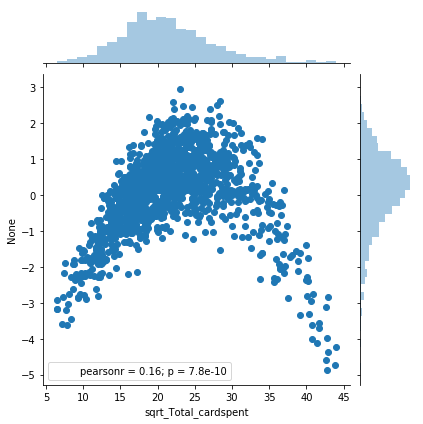

In [68]:
sns.jointplot(  test_y, residuals )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


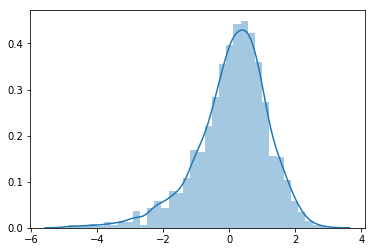

In [69]:
sns.distplot( residuals )

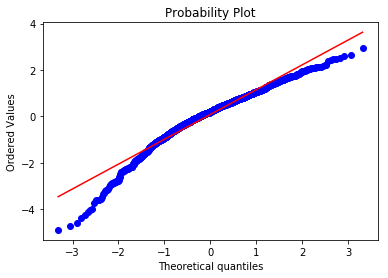

In [70]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [71]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [72]:
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 30)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(train_X, train_y)
names = train_X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

           Feat_names  F_Scores
1     Total_cardspent       inf
29       townsize_5.0  3.896291
23     spousedcat_5.0  3.588329
13       internet_3.0  3.240292
0     Total_carditems  2.393580
8      commutecat_2.0  2.272125
28       townsize_4.0  2.111782
18         reason_2.0  1.734702
6   cardtenurecat_2.0  1.718745
22     spousedcat_2.0  1.602079
20    response_02_1.0  1.566324
12       internet_2.0  1.563506
27      townsize_3.00  1.559627
17         ownpda_1.0  1.535859
16            longmon  1.534523
7           churn_1.0  1.500727
14         jobsat_4.0  1.488916
21    response_03_1.0  1.385220
4            card_5.0  1.379283
11          edcat_5.0  1.351866
5             cardmon  1.340644
26       townsize_3.0  1.326101
25      townsize_2.00  1.312043
24       townsize_2.0  1.261162
10          ebill_1.0  1.249792
19         reason_9.0  1.218689
2          carbuy_1.0  1.217243
3     carcatvalue_1.0  1.208676
15         jobsat_5.0  1.208304
9         default_1.0  1.202686


C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 2] are constant.
  UserWarning)
C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\DELL-IN\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [73]:
num=['longmon','cardmon']

In [74]:
cat=['townsize','internet','spousedcat','reason','commutecat','cardtenurecat','spousedcat','ownpda','churn','jobsat','card','edcat','ebill','carbuy','carcatvalue']

In [75]:
credit_num1 = credit_both[num]
credit_cat1 = credit[cat]

In [76]:
credit_num1['sqrt_Total_cardspent'] = credit_both["sqrt_Total_cardspent"]


credit_num1['Total_carditems'] = credit_num['Total_carditems']

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [77]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [ ]:
#for c_feature in categorical_features

for c_feat in cat:
    credit_cat1[c_feat] = credit_cat1[c_feat].astype('category')
    credit_cat1 = create_dummies(credit_cat1 , c_feat )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
credit_final = pd.concat([credit_num1, credit_cat1], axis=1)

In [ ]:
#Splitting the data

feature_columns1 = credit_nd.columns.difference( ['ln_Total_cardspent'] )
feature_columns1

In [ ]:
train_X2, test_X2, train_y2, test_y2 = train_test_split( credit_nd[feature_columns1],
                                                  credit_nd['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [ ]:
train_X2 = sm.add_constant(train_X2)
lm1=sm.OLS(train_y2,train_X2).fit()

In [ ]:
lm1.summary()

In [ ]:
test_X2 = sm.add_constant(test_X2)
y_pred2 = lm1.predict(test_X2)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y2, y_pred2)
print 'MSE:', metrics.mean_squared_error(test_y2, y_pred2)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y2, y_pred2))

In [ ]:
lm2=sm.OLS(test_y2,test_X2).fit()

In [ ]:
lm2.summary()

In [ ]:
residuals2 = test_y2 - y_pred2

In [ ]:
sns.jointplot(  test_y2, residuals2 )

In [ ]:
sns.distplot( residuals2 )

In [ ]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals2, dist="norm", plot=pylab )
pylab.show()